# Case Study: Housing Price

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('/content/kc_house_data.csv')

## Exploratory Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [7]:
print(df.describe(include='all'))

                  id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique     

### Prepare independent variable

In [8]:
X = np.array(df[['sqft_living',
                 'sqft_lot',
                 'floors',
                 'bedrooms',
                 'bathrooms',
                 'grade']]).reshape(-1,6)

### Prepare dependent variable

In [9]:
y = np.array(df['price']).reshape(-1, 1)

### Split train and test data

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Standardize the features

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression (Baseline)
Let's start with a simple linear regression model as a baseline.

In [12]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred)
linear_r2_test = r2_score(y_test, y_test_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression (Baseline):")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")

Linear Regression (Baseline):
Training R-squared: 0.5503, Training MSE: 61832825051.6817
Testing R-squared: 0.5319, Testing MSE: 57946978622.7289


## Polynomial Regression
Next, let's perform Polynomial Regression with different degrees.

In [13]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Regression:
Best Degree: 3
Training R-squared Scores: [0.621014740096516, 0.6437091988514385, 0.660856152917783]
Testing R-squared Scores: [0.5924048816072913, 0.6041950410767771, -0.05060751854462309]


## Ridge Regression
Now, let's perform Ridge regression with different alpha values.

In [14]:
# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 30, 50]

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create and fit the Ridge regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

# Find the best alpha based on the testing R-squared score
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]

print(f"\nRidge Regression:")
print(f"Best Alpha: {best_alpha_ridge:.4f}")
print(f"Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Testing R-squared Scores: {ridge_r2_test_scores}")


Ridge Regression:
Best Alpha: 50.0000
Training R-squared Scores: [0.6210147400965131, 0.6210147400962238, 0.621014740067298, 0.621014737176506, 0.6210144498907557, 0.6210121634631612, 0.6210076780682221]
Testing R-squared Scores: [0.5924048833098905, 0.5924048986329126, 0.5924050518260414, 0.5924065800505462, 0.5924214939930512, 0.5924522840138768, 0.5924799292316736]


## Lasso Regression
Next, let's perform Lasso regression with different alpha values.

In [15]:
# Create and fit the Lasso regression models with different alpha values
lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

# Find the best alpha based on the testing R-squared score
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]

print(f"\nLasso Regression:")
print(f"Best Alpha: {best_alpha_lasso:.4f}")
print(f"Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Testing R-squared Scores: {lasso_r2_test_scores}")


Lasso Regression:
Best Alpha: 50.0000
Training R-squared Scores: [0.6210147400965154, 0.6210147400964452, 0.6210147400901198, 0.621014739404435, 0.621014670043005, 0.6210141022611957, 0.6210129709224298]
Testing R-squared Scores: [0.5924048825490751, 0.5924048911773219, 0.5924049678184754, 0.5924058155955183, 0.5924142603517486, 0.5924328788425856, 0.5924507479139176]


## ElasticNet Regression
Finally, let's perform ElasticNet regression with different alpha and l1_ratio values.

In [16]:
# ElasticNet parameters (alpha and l1_ratio values)
alphas_elasticnet = [0.001, 0.01, 0.1, 1, 10, 50]
l1_ratios = [0.2, 0.5, 0.7, 0.9]

# Create and fit the ElasticNet regression models with different alpha and l1_ratio values
elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas_elasticnet:
    for l1_ratio in l1_ratios:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

# Find the best alpha and l1_ratio based on the testing R-squared score
best_alpha_elasticnet, best_l1_ratio_elasticnet = \
    alphas_elasticnet[np.argmax(elasticnet_r2_test_scores) // len(l1_ratios)], \
    l1_ratios[np.argmax(elasticnet_r2_test_scores) % len(l1_ratios)]

print(f"\nElasticNet Regression:")
print(f"Best Alpha: {best_alpha_elasticnet:.4f}, Best l1_ratio: {best_l1_ratio_elasticnet:.1f}")
print(f"Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"Testing R-squared Scores: {elasticnet_r2_test_scores}")


ElasticNet Regression:
Best Alpha: 0.1000, Best l1_ratio: 0.9
Training R-squared Scores: [0.6210141863065963, 0.6210145229979596, 0.6210146617512928, 0.6210147313683028, 0.62096370074522, 0.6209941282851681, 0.6210071486412606, 0.6210138765067397, 0.6182032100704413, 0.619656247271399, 0.6204369958565081, 0.6209366663098628, 0.5827369489664674, 0.5958154542649785, 0.6058834011813428, 0.6171311992086039, 0.4262604216168566, 0.47215113834369016, 0.5144631430917439, 0.57488954785882, 0.23286277820637846, 0.2929665445780425, 0.35612120435309924, 0.4721101751610347]
Testing R-squared Scores: [0.5924276427248438, 0.5924192916575176, 0.5924136020230802, 0.5924078138200677, 0.5925672665944801, 0.592522606019009, 0.5924823631220048, 0.5924330969605983, 0.5905988673316128, 0.5918880405019649, 0.5924499232093803, 0.5925873550966533, 0.5531502902977552, 0.5670324893612997, 0.5777959829387539, 0.5895670416818528, 0.39016268934251574, 0.43762964788302516, 0.4817236646343652, 0.5448816327944874, 0.2

## Visualization
You can visualize the R-squared scores for different regularization techniques.


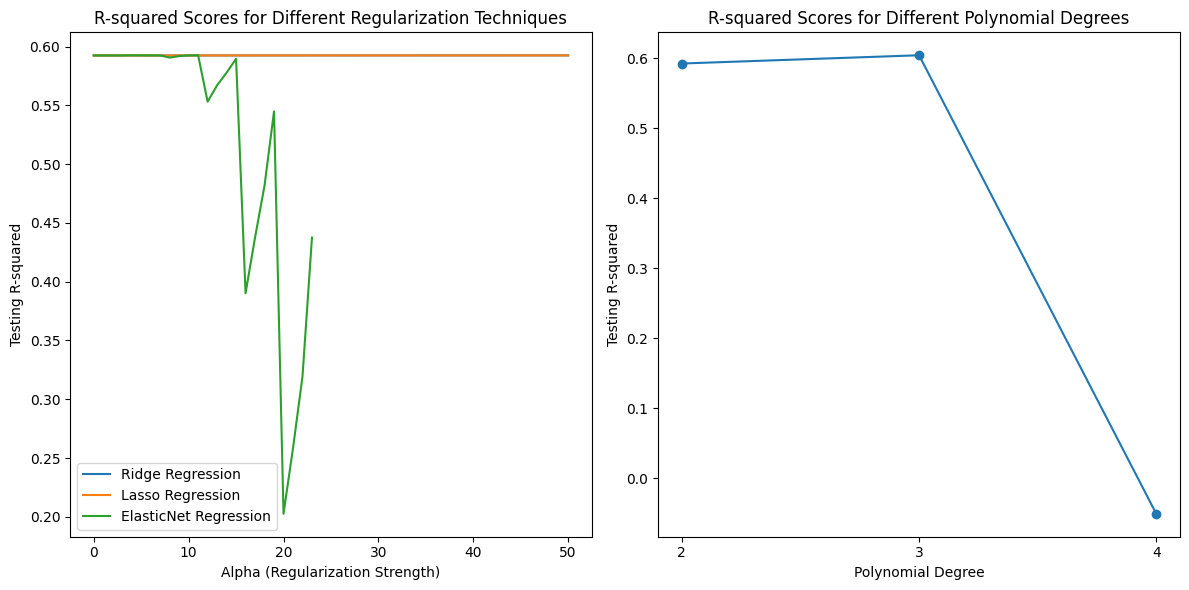

In [17]:
# Plotting R-squared scores for different regularization techniques
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_r2_test_scores, label="Ridge Regression")
plt.plot(alphas, lasso_r2_test_scores, label="Lasso Regression")
plt.plot(elasticnet_r2_test_scores, label="ElasticNet Regression")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Testing R-squared")
plt.title("R-squared Scores for Different Regularization Techniques")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, polynomial_r2_test_scores, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Testing R-squared")
plt.title("R-squared Scores for Different Polynomial Degrees")
plt.xticks(degrees)
plt.tight_layout()
plt.show()